In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ab = pd.read_csv('train.csv')

In [3]:
ab.shape

(90615, 10)

In [4]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [5]:
ab.Rings.describe()

count    90615.000000
mean         9.696794
std          3.176221
min          1.000000
25%          8.000000
50%          9.000000
75%         11.000000
max         29.000000
Name: Rings, dtype: float64

(array([  440.,  9675., 40972., 25590.,  6581.,  4686.,  1994.,   543.,
           69.,    65.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <BarContainer object of 10 artists>)

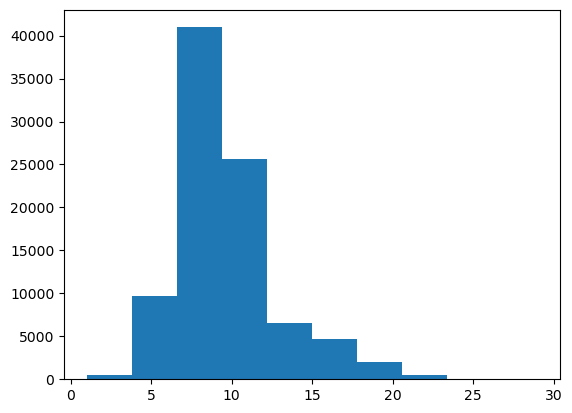

In [6]:
fig,ax = plt.subplots()
ax.hist(ab['Rings'],cumulative=False)

In [7]:
ab=pd.get_dummies(ab,columns=["Sex"],prefix_sep = "|")

In [8]:
ab.corr()

id    Length  Diameter    Height  Whole weight  \
id              1.000000  0.004724  0.004290  0.005916      0.005228   
Length          0.004724  1.000000  0.989732  0.916094      0.931449   
Diameter        0.004290  0.989732  1.000000  0.919618      0.933848   
Height          0.005916  0.916094  0.919618  1.000000      0.902344   
Whole weight    0.005228  0.931449  0.933848  0.902344      1.000000   
Whole weight.1  0.004203  0.909609  0.908466  0.861769      0.971249   
Whole weight.2  0.004878  0.913134  0.914668  0.886132      0.974319   
Shell weight    0.005887  0.911073  0.917871  0.904019      0.964201   
Rings           0.000938  0.623786  0.636832  0.665772      0.617274   
Sex|F           0.005768  0.365578  0.370765  0.367521      0.368940   
Sex|I          -0.005032 -0.656415 -0.664771 -0.645291     -0.651185   
Sex|M          -0.000424  0.315624  0.319131  0.302475      0.307096   

                Whole weight.1  Whole weight.2  Shell weight     Rings  \
id                    0.004203        0.004878      0.005887  0.000938   
Length                0.909609        0.913134      0.911073  0.623786   
Diameter              0.908466        0.914668      0.917871  0.636832   
Height                0.861769        0.886132      0.904019  0.665772   
Whole weight          0.971249        0.974319      0.964201  0.617274   
Whole weight.1        1.000000        0.949227      0.911800  0.515067   
Whole weight.2        0.949227        1.000000      0.937069  0.588954   
Shell weight          0.911800        0.937069      1.000000  0.694766   
Rings                 0.515067        0.588954      0.694766  1.000000   
Sex|F                 0.343068        0.370807      0.372127  0.296411   
Sex|I                -0.619272       -0.646484     -0.648101 -0.516591   
Sex|M                 0.299513        0.300536      0.300911  0.240048   

                   Sex|F     Sex|I     Sex|M  
id              0.005768 -0.005032 -0.000424  
Length          0.365578 -0.656415  0.315624  
Diameter        0.370765 -0.664771  0.319131  
Height          0.367521 -0.645291  0.302475  
Whole weight    0.368940 -0.651185  0.307096  
Whole weight.1  0.343068 -0.619272  0.299513  
Whole weight.2  0.370807 -0.646484  0.300536  
Shell weight    0.372127 -0.648101  0.300911  
Rings           0.296411 -0.516591  0.240048  
Sex|F           1.000000 -0.487569 -0.463848  
Sex|I          -0.487569  1.000000 -0.547320  
Sex|M          -0.463848 -0.547320  1.000000

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV,train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost

In [12]:
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
xgb = xgboost.XGBRegressor()

In [56]:
dt_params = {'max_depth':[3,4,5,6,7,8,9,10]}
rf_params = {'max_depth':[8,9],'n_estimators':[10,20,50,100,150]}
lass_params = {'alpha':[0.001,0.01,0.1,0.2,0.5]}
xgb_params = {'n_estimators':[50,100,150,250],'max_depth':[2,3,4,5],'learning_rate':[0.001,0.01,0.1]}

In [57]:
dt_cv = GridSearchCV(dt,param_grid=dt_params,cv=3,scoring='neg_root_mean_squared_error')
rf_cv = RandomizedSearchCV(rf,param_distributions=rf_params,cv=3,scoring="neg_root_mean_squared_error")
lass_cv = GridSearchCV(lass,param_grid=lass_params,cv=3,scoring='neg_root_mean_squared_error')
xgb_cv = RandomizedSearchCV(xgb,param_distributions=xgb_params,cv=3,scoring="neg_root_mean_squared_error")

In [58]:
y = ab.Rings
X = ab.drop(columns=['Rings','id'])

In [59]:
X.head()

Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0   0.550     0.430   0.150        0.7715          0.3285          0.1465   
1   0.630     0.490   0.145        1.1300          0.4580          0.2765   
2   0.160     0.110   0.025        0.0210          0.0055          0.0030   
3   0.595     0.475   0.150        0.9145          0.3755          0.2055   
4   0.555     0.425   0.130        0.7820          0.3695          0.1600   

   Shell weight  Sex|F  Sex|I  Sex|M  
0        0.2400      1      0      0  
1        0.3200      1      0      0  
2        0.0050      0      1      0  
3        0.2500      0      0      1  
4        0.1975      0      1      0

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [61]:
#dt_cv.fit(X_train,y_train)

In [62]:
#dt_cv.best_score_

In [63]:
#dt_cv.best_estimator_

In [64]:
models = {'xgb':xgb_cv}
results = {}
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    res = np.sqrt(mean_squared_error(y_test,y_pred))
    results[name] = res

In [65]:
print(results)

{'xgb': 1.8390426200340135}


In [66]:
xgb_cv.best_params_

{'n_estimators': 250, 'max_depth': 4, 'learning_rate': 0.1}

In [30]:
xgb_tuned = xgb_cv.best_estimator_

In [31]:
xgb_cv.best_estimator_.feature_importances_

array([0.01986259, 0.01313128, 0.04001353, 0.0351336 , 0.10224742,
       0.01855219, 0.6805701 , 0.01145028, 0.06979214, 0.00924686],
      dtype=float32)

In [32]:
X_test.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Sex|F', 'Sex|I', 'Sex|M'],
      dtype='object')

In [33]:
test = pd.read_csv('test.csv')

In [34]:
test.head()

id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0  90615   M   0.645     0.475   0.155        1.2380          0.6185   
1  90616   M   0.580     0.460   0.160        0.9830          0.4785   
2  90617   M   0.560     0.420   0.140        0.8395          0.3525   
3  90618   M   0.570     0.490   0.145        0.8740          0.3525   
4  90619   I   0.415     0.325   0.110        0.3580          0.1575   

   Whole weight.2  Shell weight  
0          0.3125        0.3005  
1          0.2195        0.2750  
2          0.1845        0.2405  
3          0.1865        0.2350  
4          0.0670        0.1050

In [35]:
test_pred=pd.get_dummies(test,prefix_sep='|',columns=['Sex'])

In [36]:
test_pred.set_index('id',inplace=True)

In [38]:
y_pred = xgb_tuned.predict(test_pred)

In [39]:
y_pred=y_pred.astype(int)

In [40]:
test['Rings'] = y_pred

In [41]:
test.set_index('id',inplace=True)

In [42]:
submission = pd.DataFrame(test['Rings'])

In [43]:
submission.reset_index(inplace=True)

In [44]:
submission.to_csv('submission.csv',index=False)

In [71]:
submission

id  Rings
0       90615      9
1       90616      9
2       90617     10
3       90618     10
4       90619      7
...       ...    ...
60406  151021      6
60407  151022      9
60408  151023     11
60409  151024     12
60410  151025      8

[60411 rows x 2 columns]